In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold, RandomizedSearchCV

# import graphviz
# from sklearn.tree import export_graphviz
import time

In [2]:
# na 값을 RandomForest에서 사용할 수 있게 하기 위해선 sklearn 1.4 이상 버젼이 필요(sklearn 1.4는 python 3.9 이상 필요)
sklearn.__version__
# !conda install scikit-learn=1.4 -y

'1.4.2'

In [9]:
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.style.use("default")
mpl.rcParams.update({"figure.constrained_layout.use": True})

sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [10]:
# data_prep 에서 train/test split한 pivot table

train_scaled = pd.read_csv("./train_scaled.csv",index_col=0)
test_scaled = pd.read_csv("./test_scaled.csv",index_col=0)

train = pd.read_csv("./train_orig.csv",index_col=0)
test = pd.read_csv("./test_orig.csv",index_col=0)

In [23]:
city_info = ['date_label','geo_label_city']
features_list = []

target_list = ['Cancer | All Cancer Deaths']

# 결측치가 너무 많아/불균형해 제외된 column
avoid_list = ['Substance Use | Teen Smoking',
 'Diabetes and Obesity | Teen Obesity',
 'Substance Use | Teen Alcohol',
 'Physical Activity | Teen Computer Time',
 'Physical Activity | Teen Physical Activity',
 'Substance Use | Teen Marijuana',
 'Physical Activity | Teen TV Time',
 'Dietary Quality | Teen Soda',
 'Mental Health | Electronic Bullying',
 'Mental Health | School Bullying',
 'Mental Health | Teen Mental Distress',
 'Mental Health | Teen Suicidal Ideation',
 'Physical Activity | Teen Physical Inactivity',
 'Respiratory Disease | Teen Asthma',
 'School Violence | Fighting in School',
 'School Violence | Weapons in School',
 'Birth Control | Teen Birth Control',
 'Dietary Quality | Teen Breakfast',
 'Physical Activity | Teen Physical Education',
 'Respiratory Infection | COVID-19 Deaths',
 'Respiratory Infection | COVID-19 Vaccination, Adults',
 'Respiratory Infection | COVID-19 Vaccination, Seniors',
 'Births | Prenatal Care',
 'Crime Incidents | Violent Crime',
 'Lead Poisoning | Child Lead Levels 10+ mcg/dL',
 'Lead Poisoning | Child Lead Levels 5+ mcg/dL',
 'Lead Poisoning | Child Lead Testing']

# 일부 target 따라 너무 비슷한 값(ex) All Cancer를 예측할 때 세분화된 Cancer 사망자)
targetspecific_list = ['Cancer | Breast Cancer Deaths', 'Cancer | Colorectal Cancer Deaths','Cancer | Lung Cancer Deaths','Cancer | Prostate Cancer Deaths', 'Deaths | Deaths from All Causes']

# 두가지를 합쳐서 제외해야할 항목 결정
avoid_list += targetspecific_list

x_train = train_scaled.loc[:,~(train_scaled.columns.isin(avoid_list) | train_scaled.columns.isin(target_list) | train_scaled.columns.isin(city_info))]#features_list]
y_train = train[target_list]

x_test = test_scaled.loc[:,~(test_scaled.columns.isin(avoid_list) | test_scaled.columns.isin(target_list) | test_scaled.columns.isin(city_info))]#features_list]
y_test = test[target_list]

In [25]:
import missingno as msno

for col in x_train.columns:
    x_train[col] = x_train[col].fillna(x_train[col].median())
    # x_val[col] = x_val[col].fillna(x_train[col].median())
    x_test[col] = x_test[col].fillna(x_train[col].median())
# x_train = x_train.apply(lambda x: x.fillna(x.median()),axis=0)

# x_test = x_test.apply(lambda x: x.fillna(x.median()),axis=0)

# msno.matrix(x_train)

C:\Users\Post Scriptum\AppData\Local\Temp\ipykernel_21260\3048605552.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = x_train[col].fillna(x_train[col].median())
C:\Users\Post Scriptum\AppData\Local\Temp\ipykernel_21260\3048605552.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = x_test[col].fillna(x_train[col].median())


In [26]:
#Random Forest Regressor

cities_rfc = RandomForestRegressor(n_estimators=100,oob_score=True,random_state=42)
cities_rfc.fit(x_train,y_train.values.ravel())

cities_pred_train = cities_rfc.predict(x_train)
cities_pred_test = cities_rfc.predict(x_test)

print('train mse: ' ,metrics.mean_squared_error(cities_pred_train,y_train))
print('test mse: ' ,metrics.mean_squared_error(cities_pred_test,y_test))

print('train r2: ' ,metrics.r2_score(cities_pred_train,y_train))
print('test r2: ' ,metrics.r2_score(cities_pred_test,y_test))

train mse:  3.3707897033585574
test mse:  476.8916003179086
train r2:  0.9953937808019574
test r2:  -0.2768738335125609


In [27]:
# train의 y값 평균만 줬을때보단 얼마나 나을까?
print('baseline: ' ,metrics.mean_squared_error([y_train.mean()] * 52,y_test))

baseline:  787.128374698763


<Axes: >

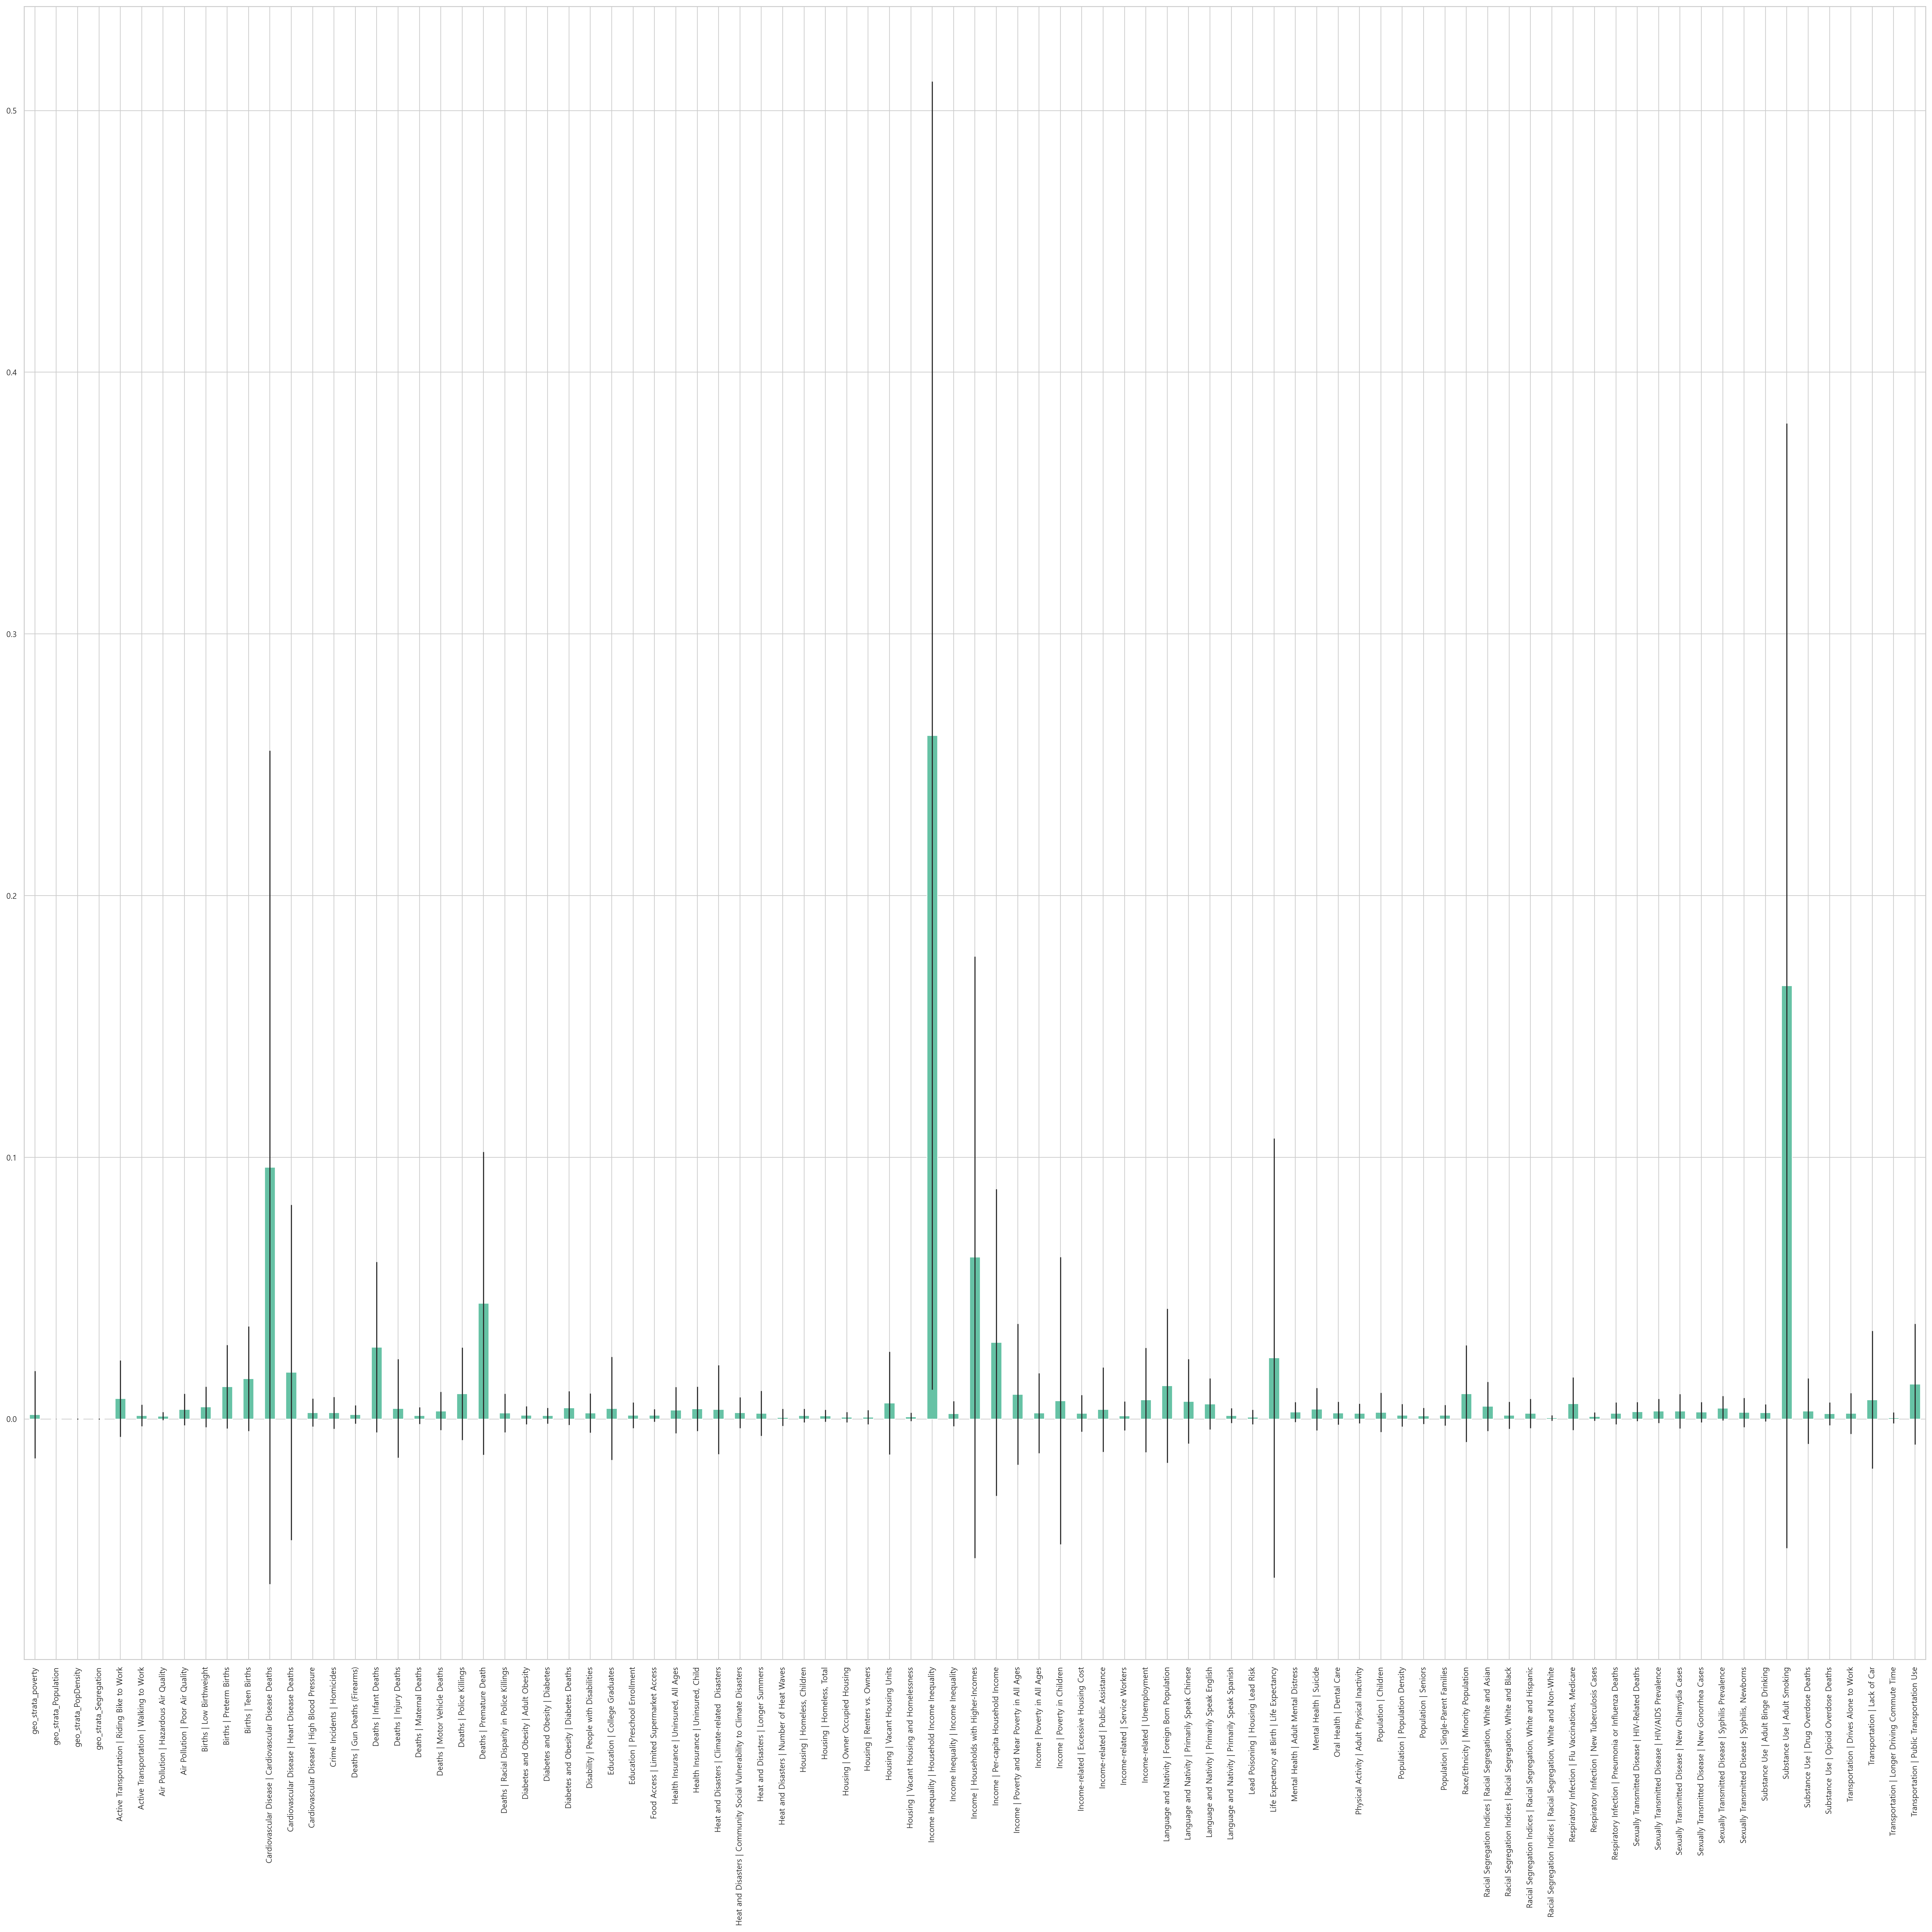

In [28]:
#feature importance 계산
importance = cities_rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in cities_rfc.estimators_], axis=0)

forest_importance = pd.Series(importance, index=x_train.columns)

fig ,ax = plt.subplots(figsize=(30,30))
forest_importance.plot.bar(yerr=std,ax=ax)

In [29]:
def threshold(p):
    return np.quantile(forest_importance,p).item()

In [30]:
df_importance = forest_importance.to_frame()

#95%
display(df_importance[df_importance[0] > threshold(0.95)])
#90%
display(df_importance[df_importance[0] > threshold(0.9)])
#10%
display(df_importance[df_importance[0] < threshold(0.1)])
#5%
display(df_importance[df_importance[0] < threshold(0.05)])

,0
Cardiovascular Disease | Cardiovascular Disease Deaths,0.096171
Deaths | Premature Death,0.044214
Income Inequality | Household Income Inequality,0.261151
Income | Households with Higher-Incomes,0.061838
Substance Use | Adult Smoking,0.165600


,0
Cardiovascular Disease | Cardiovascular Disease Deaths,0.096171
Cardiovascular Disease | Heart Disease Deaths,0.017802
Deaths | Infant Deaths,0.027467
Deaths | Premature Death,0.044214
Income Inequality | Household Income Inequality,0.261151
Income | Households with Higher-Incomes,0.061838
Income | Per-capita Household Income,0.029250
Life Expectancy at Birth | Life Expectancy,0.023309
Substance Use | Adult Smoking,0.165600


,0
geo_strata_Population,0.000012
geo_strata_PopDensity,0.000025
geo_strata_Segregation,0.000022
Heat and Disasters | Number of Heat Waves,0.000626
Housing | Owner Occupied Housing,0.000668
Housing | Renters vs. Owners,0.000730
Lead Poisoning | Housing Lead Risk,0.000748
"Racial Segregation Indices | Racial Segregation, White and Non-White",0.000411
Transportation | Longer Driving Commute Time,0.000447


,0
geo_strata_Population,0.000012
geo_strata_PopDensity,0.000025
geo_strata_Segregation,0.000022
"Racial Segregation Indices | Racial Segregation, White and Non-White",0.000411
Transportation | Longer Driving Commute Time,0.000447


In [ ]:
#지워볼만한 항목들
df_importance.index[df_importance[0] < threshold(0.1)]

Index(['geo_strata_Population', 'geo_strata_PopDensity',
       'geo_strata_Segregation', 'Deaths | Maternal Deaths',
       'Heat and Disasters | Number of Heat Waves',
       'Housing | Owner Occupied Housing', 'Income-related | Service Workers',
       'Population | Population Density',
       'Racial Segregation Indices | Racial Segregation, White and Non-White'],
      dtype='object')

In [ ]:
#위의 항목들 지우고 다시 하려면 여기 코드로 데이터 다시 정립
# avoid_list += df_importance.index[df_importance[0] < threshold(0.1)].to_list()

# x_train = train_scaled.loc[:,~(train_scaled.columns.isin(avoid_list) | train_scaled.columns.isin(target_list) | train_scaled.columns.isin(city_info))]#features_list]
# y_train = train[target_list]

# x_test = test_scaled.loc[:,~(test_scaled.columns.isin(avoid_list) | test_scaled.columns.isin(target_list) | test_scaled.columns.isin(city_info))]#features_list]
# y_test = test[target_list]

In [18]:
#heuristic하게 고른 항목들로만 하면 얼마나 나을까?

heuristic_list = ["Cancer | Breast Cancer Deaths",
"Cancer | Prostate Cancer Deaths",
"Physical Activity | Adult Physical Inactivity",
"Diabetes and Obesity | Diabetes",
"Diabetes and Obesity | Teen Obesity",
"Diabetes and Obesity | Adult Obesity",
"Dietary Quality | Teen Soda",
"Population | Seniors",
"Health Insurance | Uninsured, All Ages",
"Births | Low Birthweight",
"Births | Prenatal Care",
"Births | Preterm Births",
"Births | Teen Births",
"Income | Poverty in All Ages"]

x_train = x_train = train_scaled.loc[:,train_scaled.columns.isin(heuristic_list) & ~(train_scaled.columns.isin(avoid_list))]#features_list]
y_train = train[target_list]

x_test = test_scaled.loc[:,test_scaled.columns.isin(heuristic_list) & ~(test_scaled.columns.isin(avoid_list))]#features_list]
y_test = test[target_list]

In [ ]:
# msno.matrix(x_train)
# x_train = x_train.apply(lambda x: x.fillna(x.mean()),axis=0)

In [20]:
cities_rfc = RandomForestRegressor(n_estimators=100,oob_score=True,random_state=42)
cities_rfc.fit(x_train,y_train.values.ravel())

cities_pred_train = cities_rfc.predict(x_train)
cities_pred_test = cities_rfc.predict(x_test)

print('train mse: ' ,metrics.mean_squared_error(cities_pred_train,y_train))
print('test mse: ' ,metrics.mean_squared_error(cities_pred_test,y_test))
print('baseline mse: ' ,metrics.mean_squared_error([y_train.mean()] * 52,y_test))

print('train rmsle: ' ,metrics.root_mean_squared_log_error(cities_pred_train,y_train))
print('test rmsle: ' ,metrics.root_mean_squared_log_error(cities_pred_test,y_test))
print('baseline rmsle: ' ,metrics.root_mean_squared_log_error([y_train.mean()] * 52,y_test))

train mse:  8.308217032767253
test mse:  429.2898050422067
baseline mse:  787.128374698763
train rmsle:  0.01772984881591639
test rmsle:  0.1281389012648688
baseline rmsle:  0.1771112323961681


<Axes: >

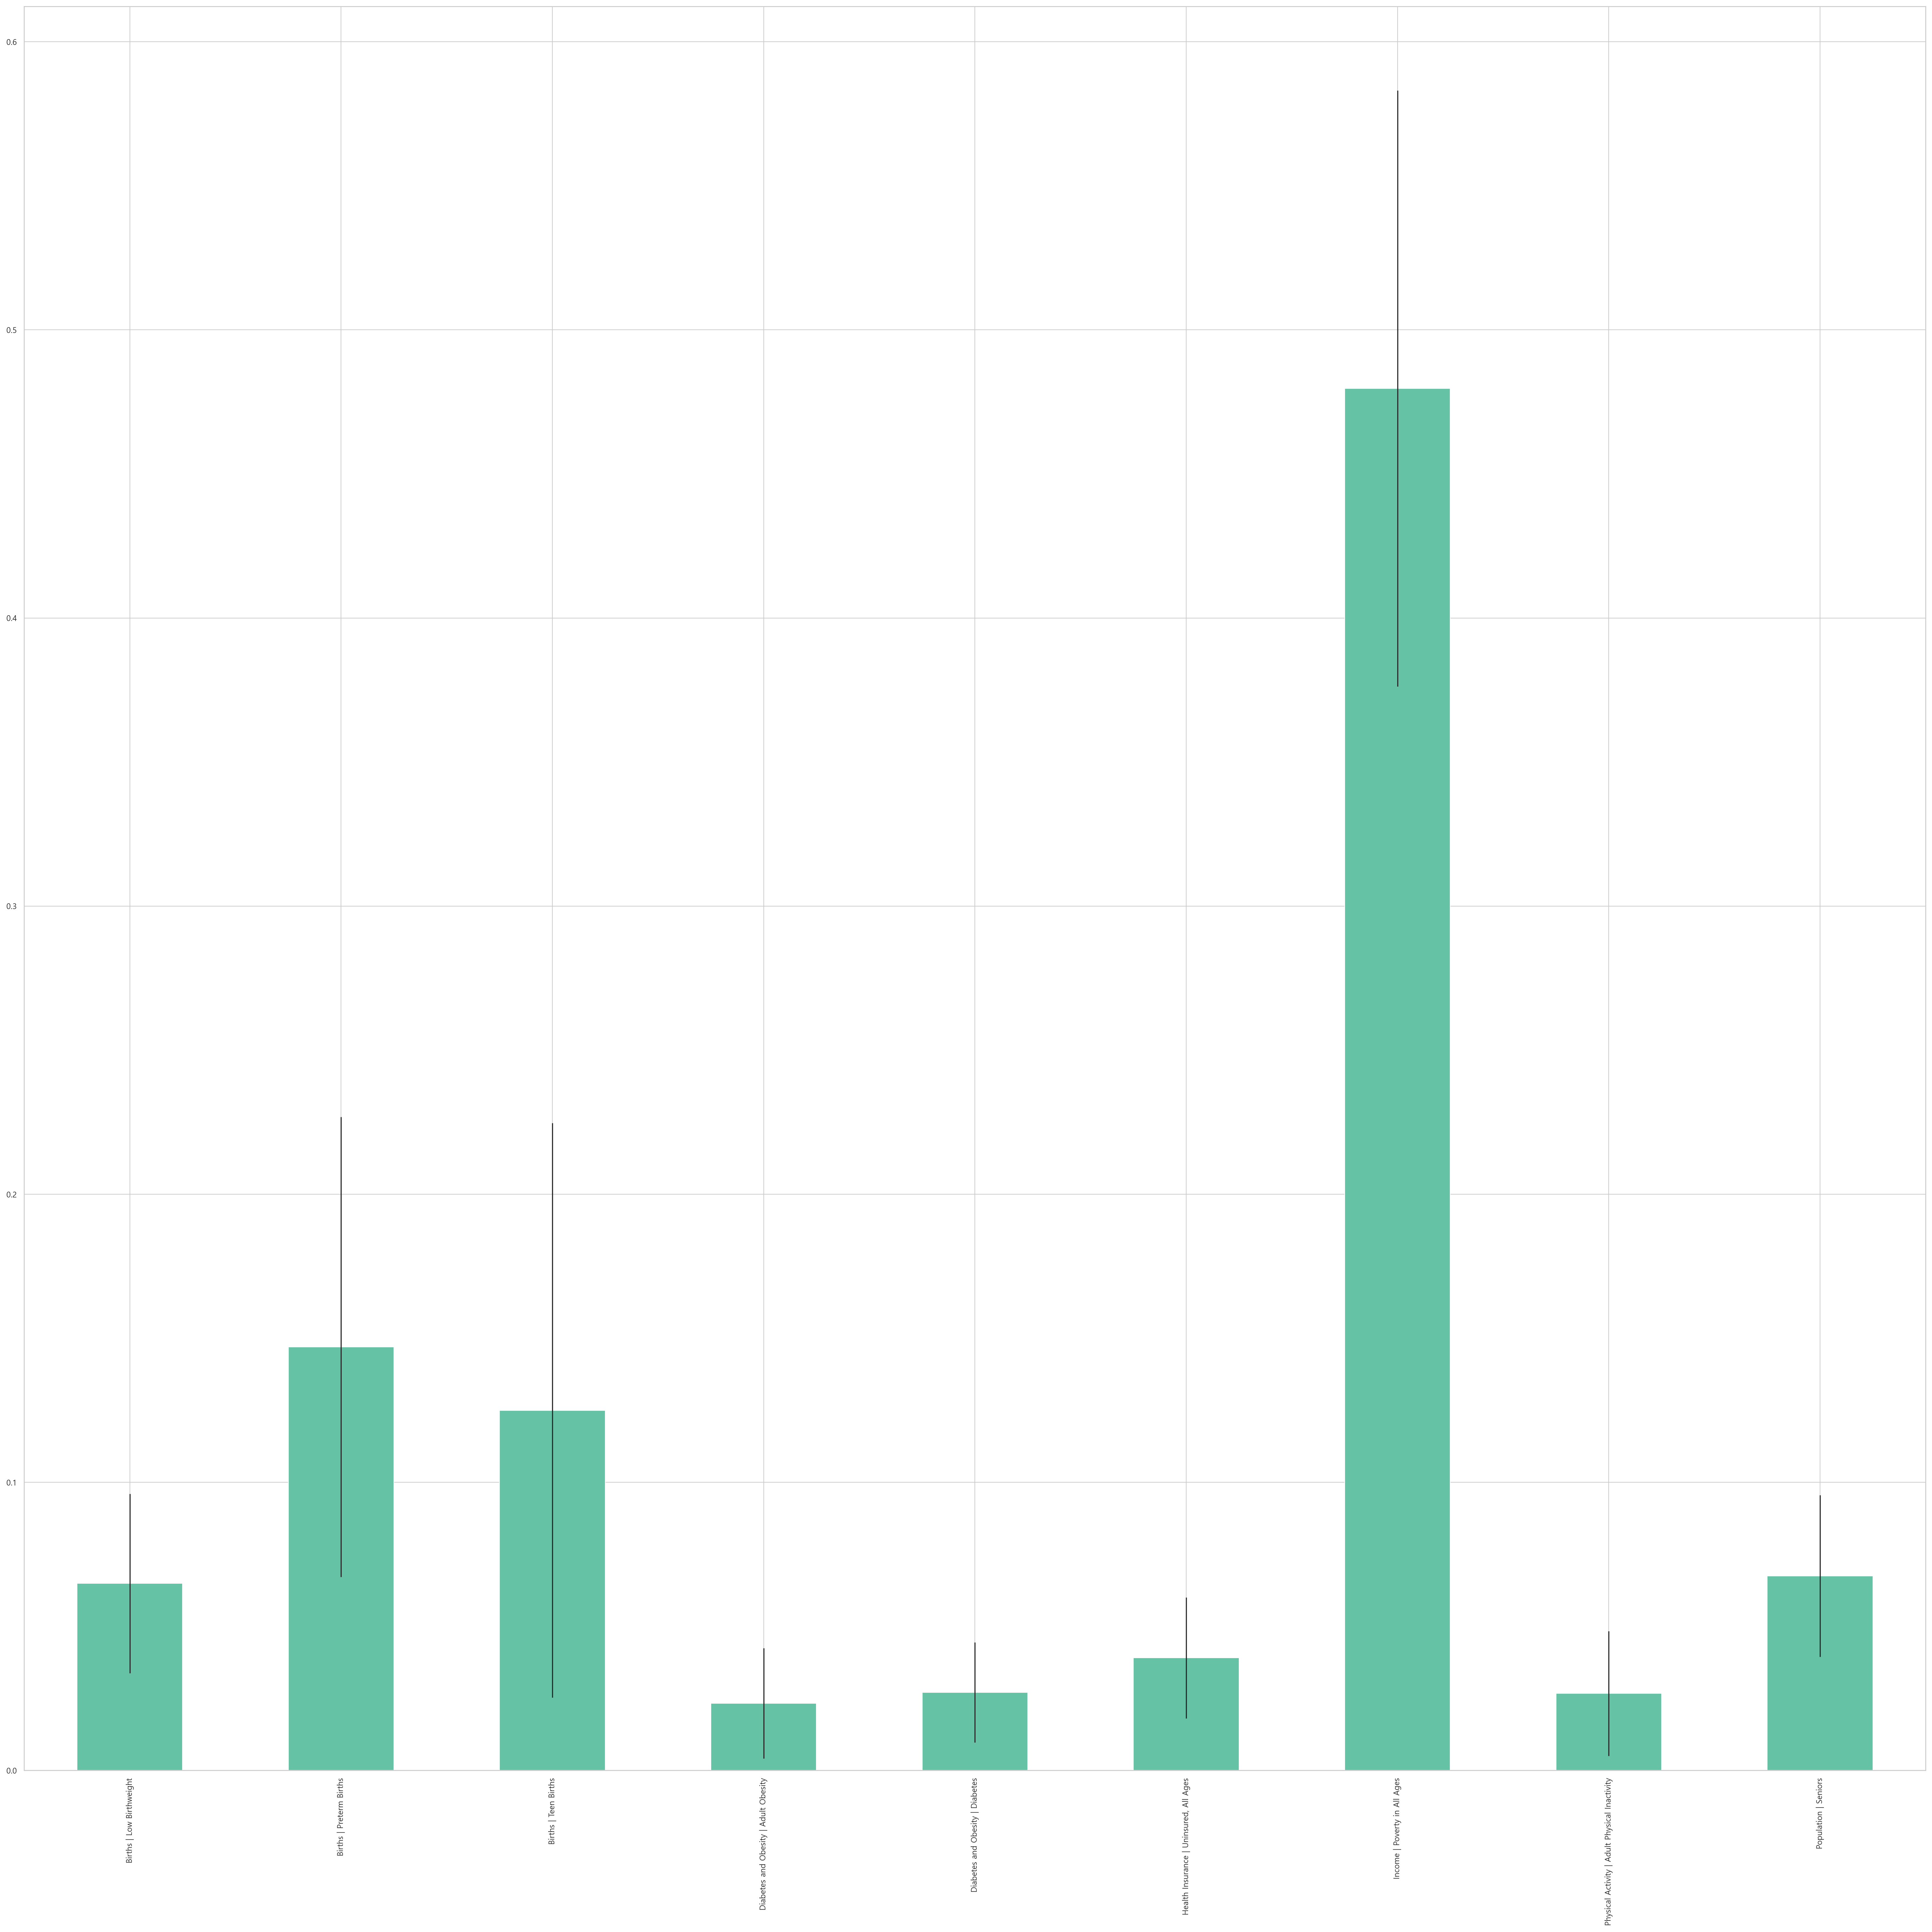

In [21]:
importance = cities_rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in cities_rfc.estimators_], axis=0)

forest_importance = pd.Series(importance, index=x_train.columns)

fig ,ax = plt.subplots(figsize=(30,30))
forest_importance.plot.bar(yerr=std,ax=ax)

In [22]:
df_importance = forest_importance.to_frame()

#95%
display(df_importance[df_importance[0] > threshold(0.95)])
#90%
display(df_importance[df_importance[0] > threshold(0.9)])
#10%
display(df_importance[df_importance[0] < threshold(0.1)])
#5%
display(df_importance[df_importance[0] < threshold(0.05)])

NameError: name 'threshold' is not defined